<h1>Aggregate all 30 stocks in the DJIA</h1>

In [17]:
DJIA_STOCKS = ['MSFT', 'AAPL', 'AMZN', 'JPM', 'WMT', 'V', 'UNH', 'PG', 'JNJ', 'HD', 'MRK', 'CVX', 'KO', 'CRM', 'CSCO', 'MCD', 'DIS', 'VZ', 'AXP', 'AMGN', 'CAT', 'IBM', 'GS', 'HON', 'INTC', 'NIKE', 'BA', 'MMM', 'TRV', 'DOW']
len(DJIA_STOCKS) == 30
# No pruning of data needed.

True

<h2>Yahoo Finance does not require an api key!</h2>
<b>Run this cell once, then all of the data will be saved in a pickle (and csv files)!</b>

In [18]:
import yfinance as yf
import pickle
import os

stock_market_cap = {}
stock_data = {}

if 'DJIA Historical Data' not in os.listdir():
    os.mkdir('DJIA Historical Data')

    for stock in DJIA_STOCKS:
        ticker_data = yf.Ticker(stock)
        hist = ticker_data.history(period='max')
    
        hist.to_csv(f'DJIA Historical Data/{stock}.csv')
        stock_data[stock] = hist
        if 'marketCap' in ticker_data.info:
            stock_market_cap[stock] = ticker_data.info['marketCap']
        else:
            print(f'{stock} DOES NOT HAVE MARKET CAP DATA.')
else:
    print("DJIA Historical Data already pulled.")


if 'stock_ohlcv.pkl' not in os.listdir():
    pickle.dump(stock_data, open('stock_ohlcv.pkl', 'wb'))
else:
    print("DJIA's OHLCV Data already pickled.")


if 'stock_market_cap.pkl' not in os.listdir():
    pickle.dump(stock_market_cap, open('stock_market_cap.pkl', 'wb'))
else:
    print("DJIA's Market Cap Data already pickled.")

print("DONE!")

DJIA Historical Data already pulled.
DJIA's OHLCV Data already pickled.
DJIA's Market Cap Data already pickled.
DONE!


<h1>Once you download all of the DJIA data, always load the data here!</h1>

In [19]:
djia_data = pickle.load(open('stock_ohlcv.pkl', 'rb'))
djia_market_cap = pickle.load(open('stock_market_cap.pkl', 'rb'))

<h1>Remove all stocks with no entries.</h1>

In [20]:
for stock in DJIA_STOCKS:
    if len(djia_data[stock]) <= 0:
        DJIA_STOCKS.remove(stock)
print(f'STOCKS IN DJIA CURRENTLY: {len(DJIA_STOCKS)}')

STOCKS IN DJIA CURRENTLY: 29


<H1>Calculate 1M, 6M, 2Y, and ALL-TIME volatility, average price, increasing days, and decreasing days.</H1>

In [21]:
import numpy as np
import datetime as dt
from pandas import DatetimeIndex
today = np.datetime64('2024-07-06', 'ns')

In [22]:
import pandas as pd
import math
pd.set_option('display.width', 200) 

temp_djia_data = {}
summary_statistics = pd.DataFrame(index=DJIA_STOCKS)

#temp = []
for stock in DJIA_STOCKS:
    df = djia_data[stock]
    df.index = df.index.tz_localize(None)
    df = df.reset_index()
    temp_djia_data[stock] = df
    #temp_df = df[df['Date'] > today - np.timedelta64(7, 'D')]
    #temp_df = temp_df.reset_index()
    #print(temp_df)
    #df[date] = df[df['Date'] > today]
    #print(df)
temp_stats = {}
for stock in DJIA_STOCKS: #1M Volatility
    df = temp_djia_data[stock]
    df = df[df['Date'] > today - np.timedelta64(31, 'D')]
    std = df['Close'].std()
    count = df['Close'].count()
    temp_stats[stock] = std / math.sqrt(count)
summary_statistics['1M Vol.'] = temp_stats
temp_stats = {}

for stock in DJIA_STOCKS: # 1M Average Price
    df = temp_djia_data[stock]
    df = df[df['Date'] > today - np.timedelta64(31, 'D')]

    avg = df['Close'].mean()
    temp_stats[stock] = avg
summary_statistics['1M Avg. Close'] = temp_stats
temp_stats = {}



temp_stats1 = {}
for stock in DJIA_STOCKS: #1M Increasing & Decreasing Days
    df = temp_djia_data[stock]
    df = df[df['Date'] > today - np.timedelta64(31, 'D')]
    inc = dec = 0

    skipFirst = False
    last_price = None
    for close in df['Close'].iloc:
        if not skipFirst:
            skipFirst = True
            last_price = close
            continue
        if last_price > close:
            dec += 1
        else:
            inc += 1
    temp_stats[stock] = inc
    temp_stats1[stock] = dec
summary_statistics['1M Inc. Days'] = temp_stats
summary_statistics['1M Dec. Days'] = temp_stats1

temp_stats = {}
for stock in DJIA_STOCKS: #6M Volatility
    df = temp_djia_data[stock]
    df = df[df['Date'] > today - np.timedelta64(31*6, 'D')]
    std = df['Close'].std()
    count = df['Close'].count()
    temp_stats[stock] = std / math.sqrt(count)
summary_statistics['6M Vol.'] = temp_stats
temp_stats = {}

for stock in DJIA_STOCKS: # 6M Average Price
    df = temp_djia_data[stock]
    df = df[df['Date'] > today - np.timedelta64(31*6, 'D')]

    avg = df['Close'].mean()
    temp_stats[stock] = avg
summary_statistics['6M Avg. Close'] = temp_stats
temp_stats = {}

temp_stats1 = {}
for stock in DJIA_STOCKS: #6M Increasing & Decreasing Days
    df = temp_djia_data[stock]
    df = df[df['Date'] > today - np.timedelta64(31*6, 'D')]
    inc = dec = 0

    skipFirst = False
    last_price = None
    for close in df['Close'].iloc:
        if not skipFirst:
            skipFirst = True
            last_price = close
            continue
        if last_price > close:
            dec += 1
        else:
            inc += 1
        last_price = close
    temp_stats[stock] = inc
    temp_stats1[stock] = dec
summary_statistics['6M Inc. Days'] = temp_stats
summary_statistics['6M Dec. Days'] = temp_stats1



temp_stats = {}
for stock in DJIA_STOCKS: #2Y Volatility
    df = temp_djia_data[stock]
    df = df[df['Date'] > today - np.timedelta64(365*2, 'D')]
    std = df['Close'].std()
    count = df['Close'].count()
    temp_stats[stock] = std / math.sqrt(count)
summary_statistics['2Y Vol.'] = temp_stats
temp_stats = {}

for stock in DJIA_STOCKS: # 2Y Average Price
    df = temp_djia_data[stock]
    df = df[df['Date'] > today - np.timedelta64(365*2, 'D')]

    avg = df['Close'].mean()
    temp_stats[stock] = avg
summary_statistics['2Y Avg. Close'] = temp_stats
temp_stats = {}

temp_stats1 = {}
for stock in DJIA_STOCKS: #6M Increasing & Decreasing Days
    df = temp_djia_data[stock]
    df = df[df['Date'] > today - np.timedelta64(365*2, 'D')]
    inc = dec = 0

    skipFirst = False
    last_price = None
    for close in df['Close'].iloc:
        if not skipFirst:
            skipFirst = True
            last_price = close
            continue
        if last_price > close:
            dec += 1
        else:
            inc += 1
        last_price = close
    temp_stats[stock] = inc
    temp_stats1[stock] = dec
summary_statistics['2Y Inc. Days'] = temp_stats
summary_statistics['2Y Dec. Days'] = temp_stats1




temp_stats = {}
for stock in DJIA_STOCKS: #ALL-TIME Volatility
    df = temp_djia_data[stock]
    std = df['Close'].std()
    count = df['Close'].count()
    temp_stats[stock] = std / math.sqrt(count)
summary_statistics['ALL-TIME Vol.'] = temp_stats
temp_stats = {}

for stock in DJIA_STOCKS: # ALL-TIME Average Price
    df = temp_djia_data[stock]

    avg = df['Close'].mean()
    temp_stats[stock] = avg
summary_statistics['ALL-TIME Avg. Close'] = temp_stats
temp_stats = {}

temp_stats1 = {}
for stock in DJIA_STOCKS: #ALL-TIME Increasing & Decreasing Days
    df = temp_djia_data[stock]
    inc = dec = 0

    skipFirst = False
    last_price = None
    for close in df['Close'].iloc:
        if not skipFirst:
            skipFirst = True
            last_price = close
            continue
        if last_price > close:
            dec += 1
        else:
            inc += 1
        last_price = close
    temp_stats[stock] = inc
    temp_stats1[stock] = dec
summary_statistics['ALL-TIME Inc. Days'] = temp_stats
summary_statistics['ALL-TIME Dec. Days'] = temp_stats1

print(summary_statistics)

       1M Vol.  1M Avg. Close  1M Inc. Days  1M Dec. Days   6M Vol.  6M Avg. Close  6M Inc. Days  6M Dec. Days   2Y Vol.  2Y Avg. Close  2Y Inc. Days  2Y Dec. Days  ALL-TIME Vol.  \
MSFT  2.626514     445.962001            18             1  1.708001     414.842490            70            56  3.036538     322.254734           261           239       0.903777   
AAPL  1.900753     210.983000            18             1  1.261706     185.132007            67            59  0.894156     169.493257           263           237       0.428827   
AMZN  1.346333     189.571500            14             5  1.066291     176.382598            69            57  1.372040     133.238743           261           239       0.644531   
JPM   1.094499     197.975735            13             6  1.010656     187.254909            72            54  1.257126     145.901219           280           220       0.387759   
WMT   0.207225      67.586000            13             6  0.406365      60.246428        

<h1>Calculating returns then store in a pickle</h1>
<b>This will take a while if running first time (and is not pickled)...</b>

In [23]:
if 'djia_returns.pkl' not in os.listdir():
    djia_returns = {}
    print("START")
    for i,stock in enumerate(DJIA_STOCKS):
        print(f'{(i+1)/len(DJIA_STOCKS) * 100}%-\t{stock}')
        temp_data = []
        df = djia_data[stock]
    
        last_close = None
        skippedFirst = False
        for row in df.iloc:
            close = row['Close']
            if not skippedFirst:
                skippedFirst = True
                last_close = close
                temp_data.append(0)
                continue
            temp_data.append(close / last_close - 1)
            last_close = close
        djia_returns[stock] = pd.DataFrame({'Date': df.index, 'Return': temp_data})
    
    #df_returns = pd.DataFrame(djia_returns)
    
    pickle.dump(djia_returns, open('djia_returns.pkl', 'wb'))
else:
    print(f'"djia_returns.pkl" ALREADY EXISTS.')

print('DONE')
    

"djia_returns.pkl" ALREADY EXISTS.
DONE


<h1>Unpickle djia_returns.pkl</h1>

In [24]:
djia_returns = pickle.load(open('djia_returns.pkl', 'rb'))

<h1>RUN THIS TO PLOT ALL RETURNS!</h1>

C:\Users\Edwar\.virtualenvs\PGI-Quant-Summer-Project\Lib\site-packages\pandas\plotting\_matplotlib\core.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


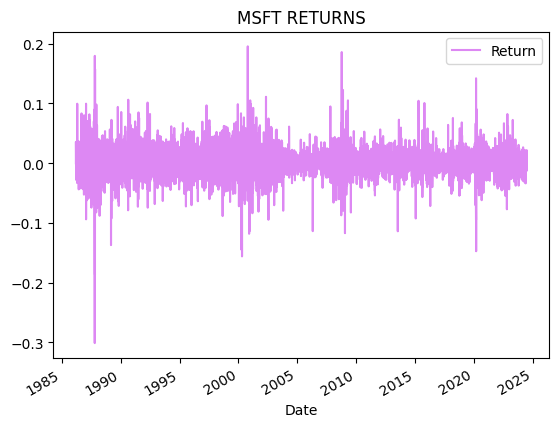

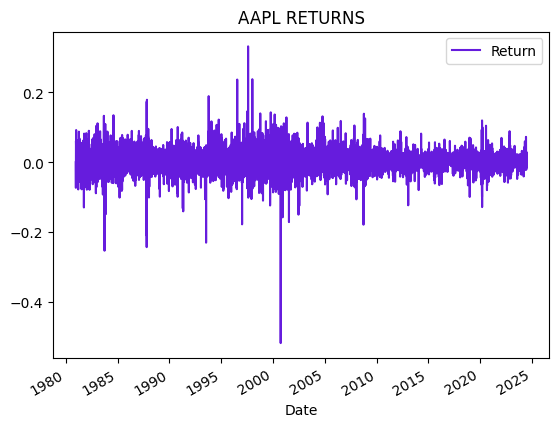

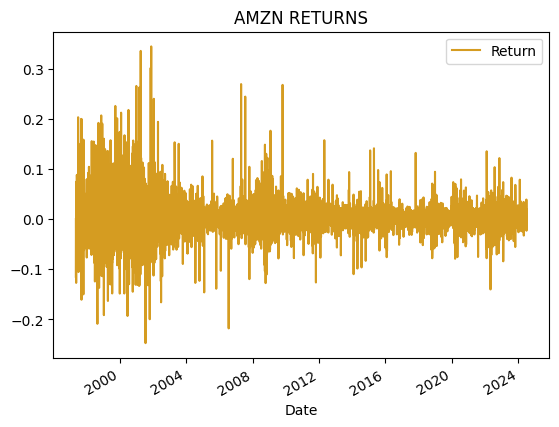

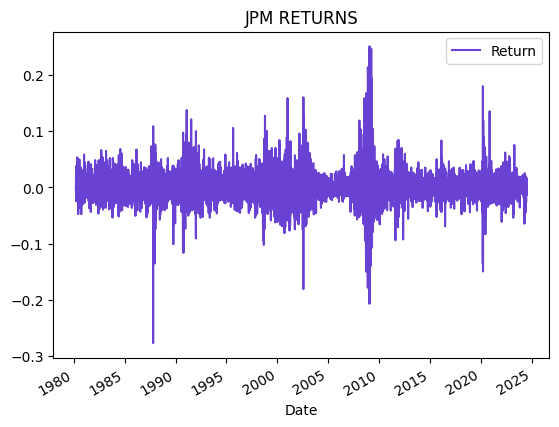

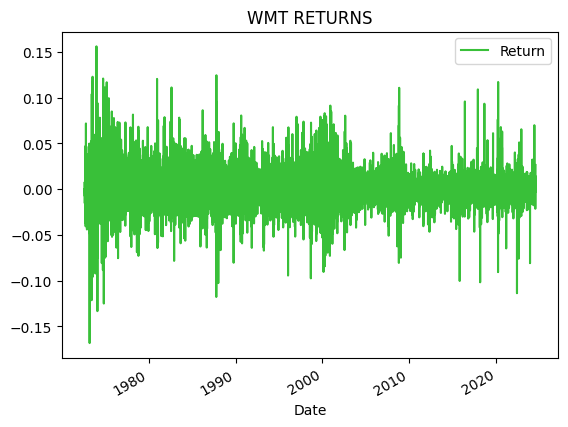

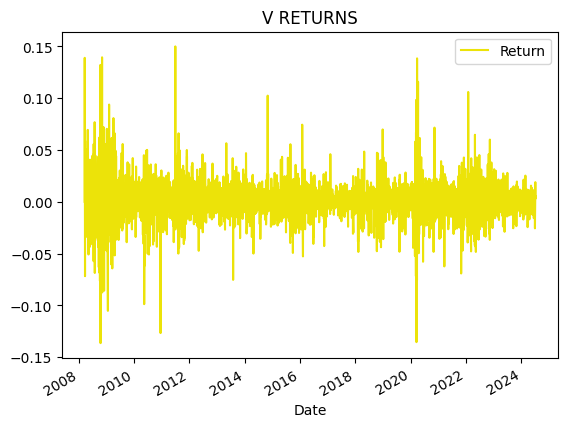

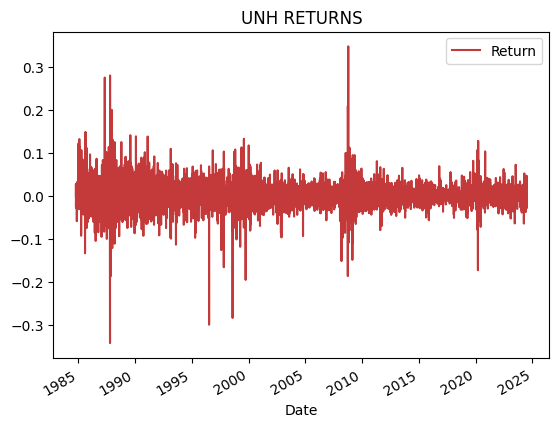

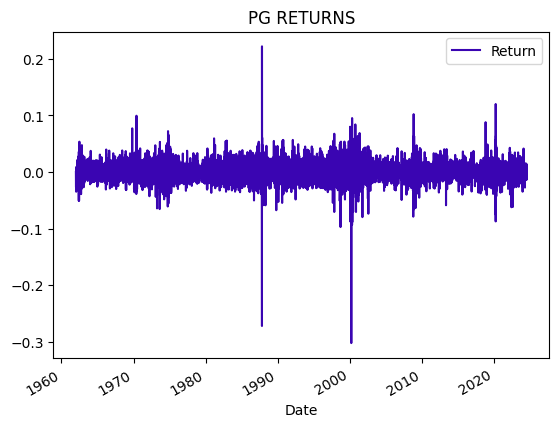

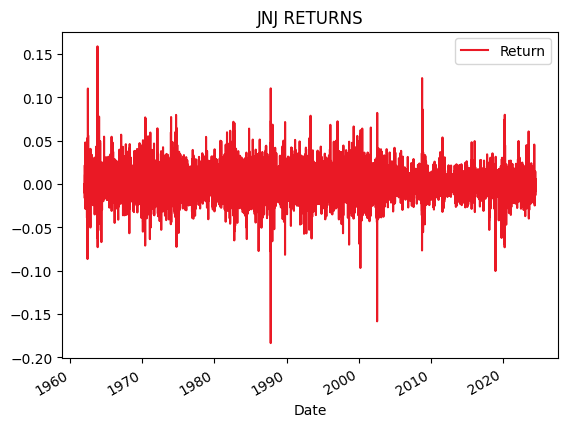

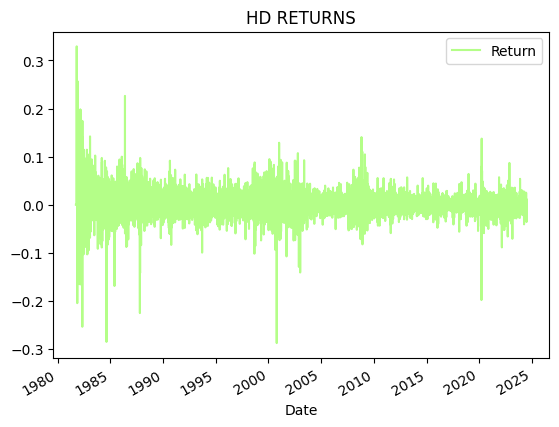

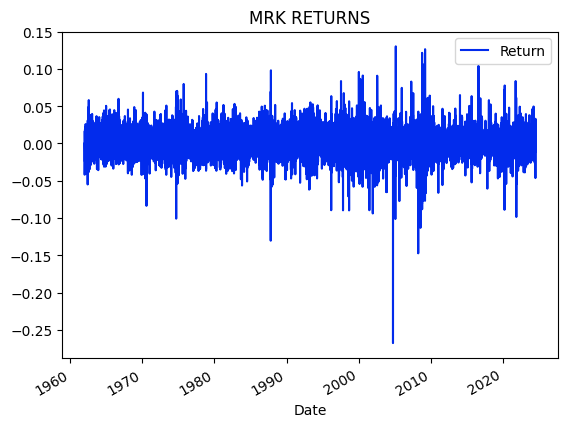

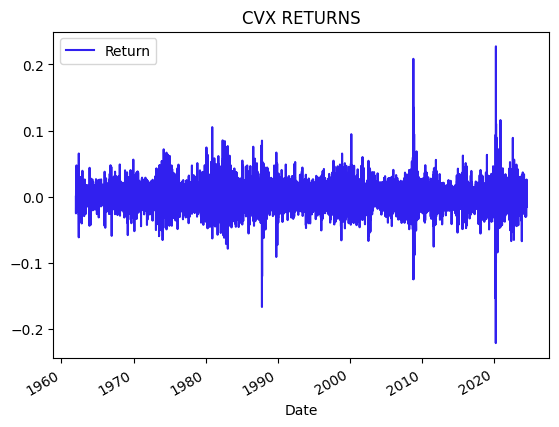

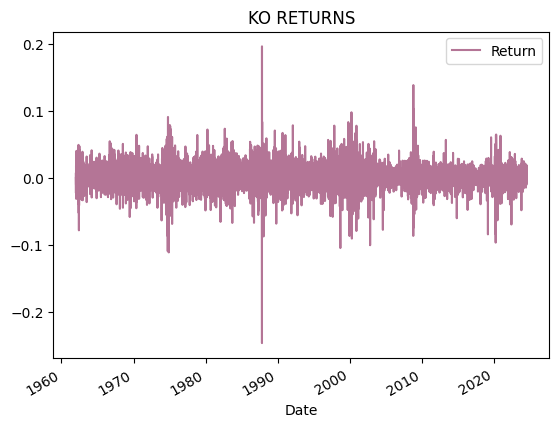

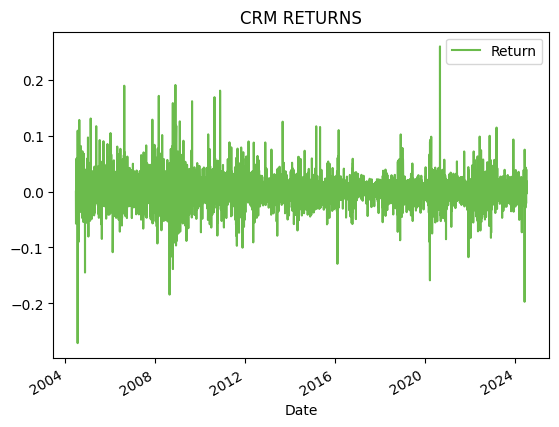

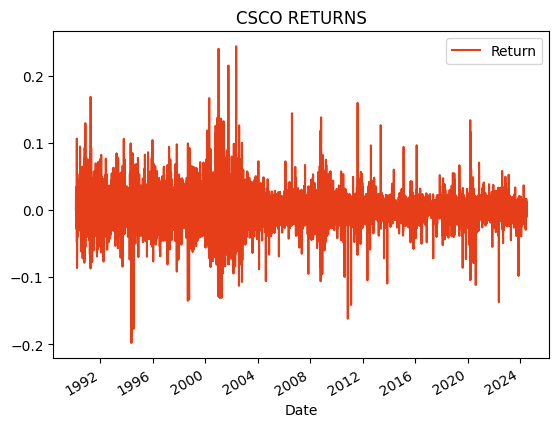

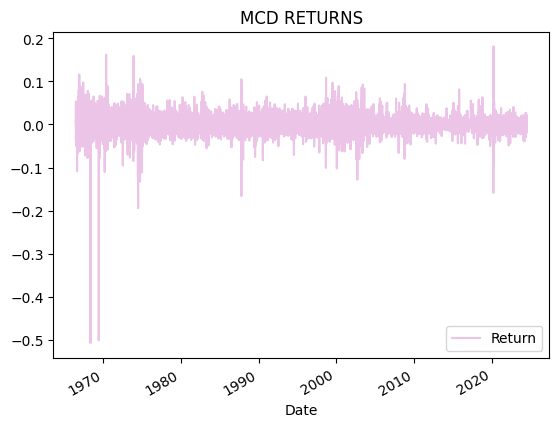

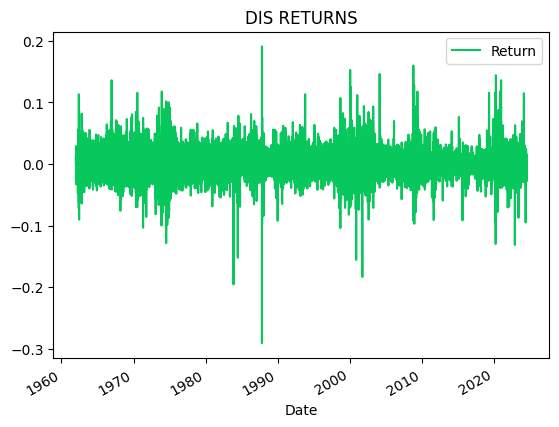

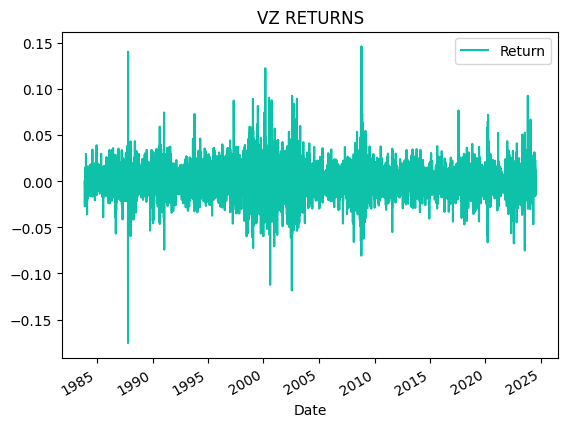

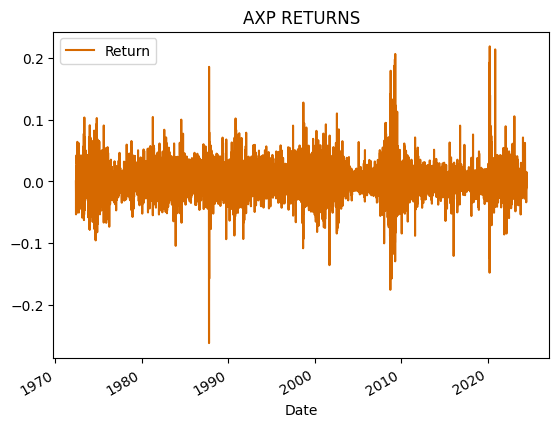

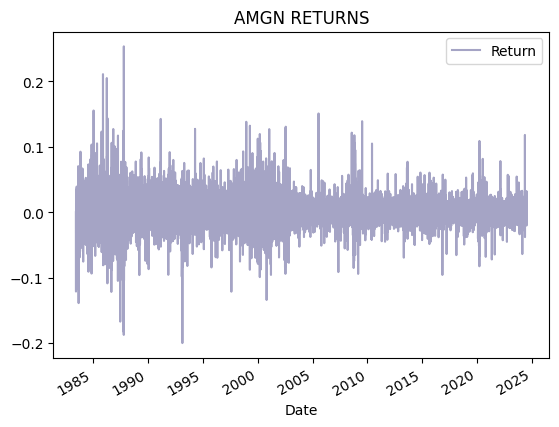

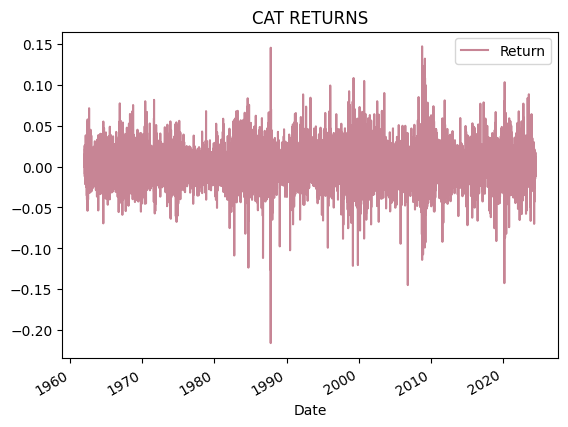

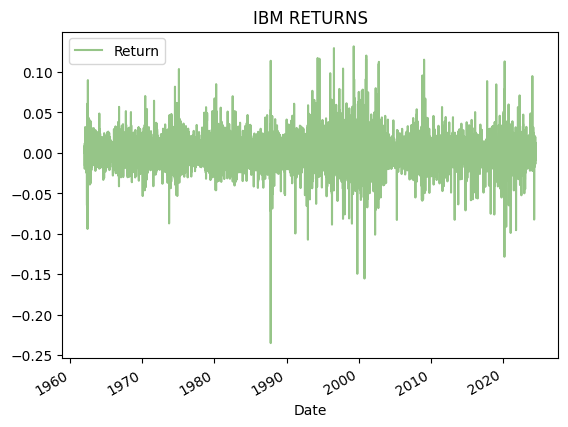

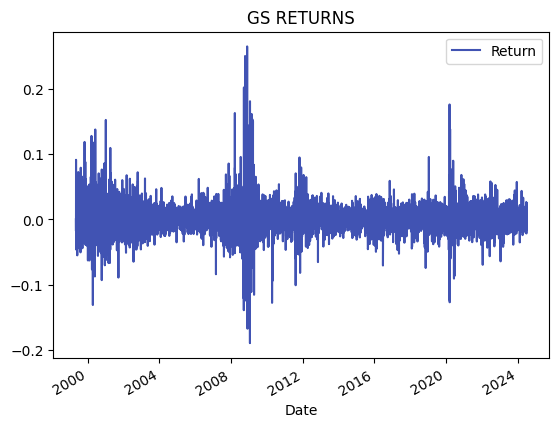

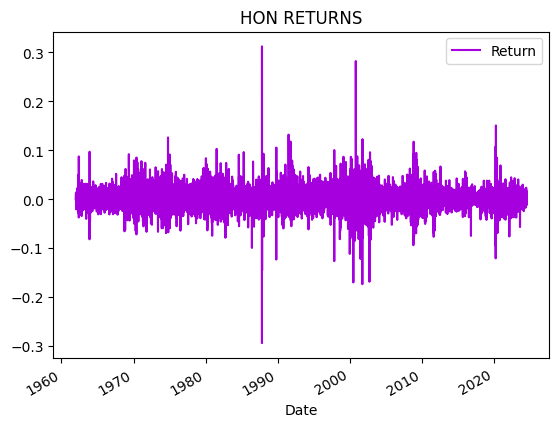

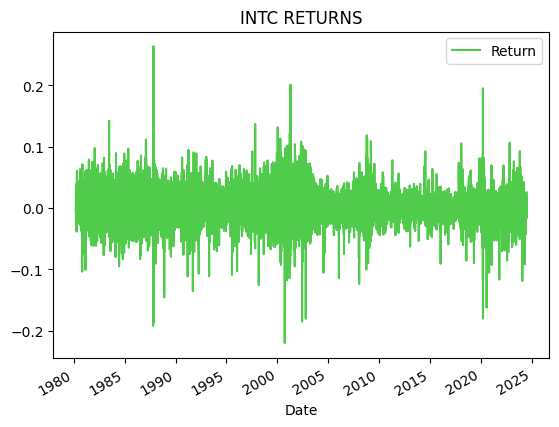

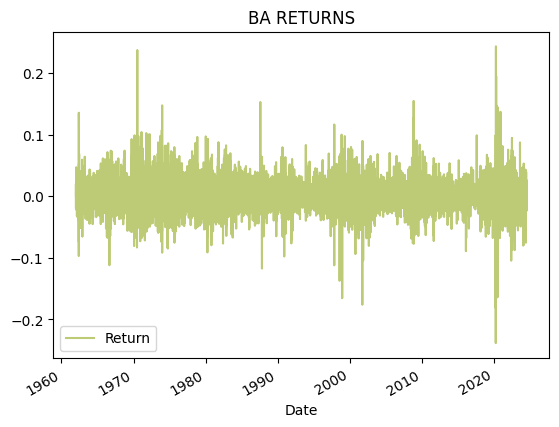

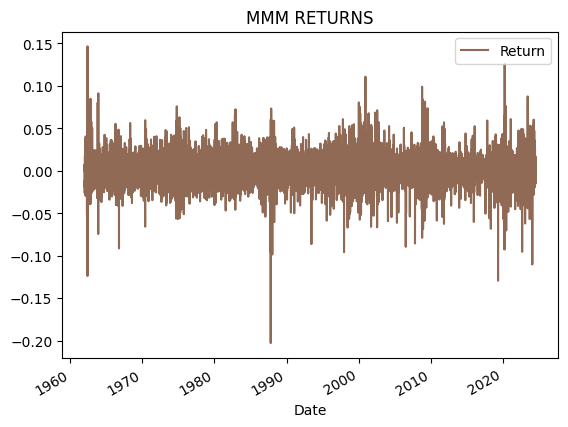

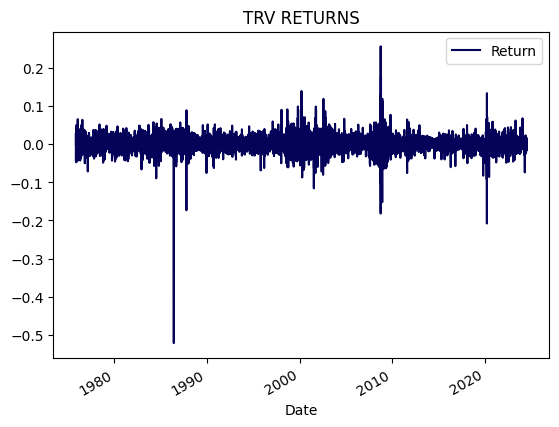

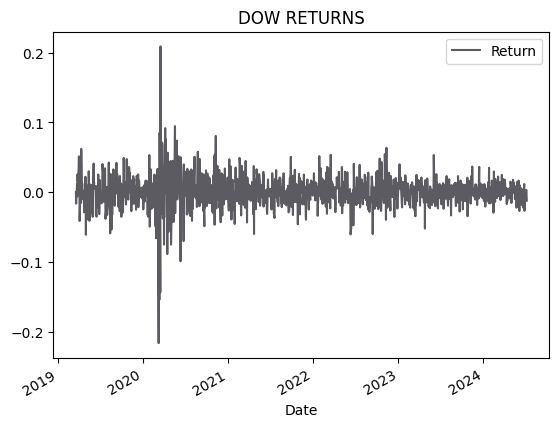

In [25]:
#djia_returns['AAPL'].plot(x='Date', y='Return')
import random
for stock in djia_returns:
    color = "#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
    djia_returns[stock].plot(x='Date', y='Return', title=f'{stock} RETURNS', color=color)

<h1>Creating CORR matrix (from returns)</h1>

In [26]:
import matplotlib.pyplot as plt
# We want 7,300 days worth of data (20 yrs)
return_eligible_stocks = {}

for stock in djia_returns:
    if len(djia_returns[stock]) > 365*20: # this is not precise because there are not 365 trading days/year but it will get the job done, and is an overestimate so it won't cause out-of-bounds exceptions
        return_eligible_stocks[stock] = None
print(return_eligible_stocks)
print(f'Eligible stocks: {len(return_eligible_stocks)}')

first_date = today - np.timedelta64(365*20, 'D')

df_list = []

for stock in return_eligible_stocks:
    df = djia_returns[stock]
    df = df[df['Date'] > first_date]
    df = df.set_index('Date')
    df = df.rename(columns={"Return": f"{stock} Returns"})
    df_list.append(df)

return_matrix = pd.concat(df_list, axis=1).sort_index()
#return_marix = return_matrix[return_matrix['Date'] > first_date]
#print(return_matrix)


{'MSFT': None, 'AAPL': None, 'JPM': None, 'WMT': None, 'UNH': None, 'PG': None, 'JNJ': None, 'HD': None, 'MRK': None, 'CVX': None, 'KO': None, 'CSCO': None, 'MCD': None, 'DIS': None, 'VZ': None, 'AXP': None, 'AMGN': None, 'CAT': None, 'IBM': None, 'HON': None, 'INTC': None, 'BA': None, 'MMM': None, 'TRV': None}
Eligible stocks: 24


<h1>3 Month Correlation Matrix</h1>

In [27]:
curr_matrix = return_matrix.reset_index()
curr_matrix = curr_matrix[curr_matrix['Date'] > today - np.timedelta64(90, 'D')]
curr_matrix.set_index('Date')

corr = curr_matrix.corr()
corr.style.background_gradient(cmap='coolwarm')

,Date,MSFT Returns,AAPL Returns,JPM Returns,WMT Returns,UNH Returns,PG Returns,JNJ Returns,HD Returns,MRK Returns,CVX Returns,KO Returns,CSCO Returns,MCD Returns,DIS Returns,VZ Returns,AXP Returns,AMGN Returns,CAT Returns,IBM Returns,HON Returns,INTC Returns,BA Returns,MMM Returns,TRV Returns
Date,1.000000,0.232031,0.115960,0.104792,0.087456,-0.145904,-0.177217,0.044487,0.082785,-0.036517,-0.044550,-0.045729,0.049892,-0.089614,0.050538,0.131554,-0.058868,-0.065467,0.089354,0.216879,0.058207,0.265385,0.096481,-0.093846,0.043400
MSFT Returns,0.232031,1.000000,0.424209,-0.009075,-0.001996,-0.191604,-0.161133,0.043947,0.173053,0.094209,-0.022540,-0.026605,0.136101,-0.029764,0.252845,-0.087477,0.015852,0.198912,0.383673,0.390961,0.078300,0.191931,0.114010,-0.157790,-0.109900
AAPL Returns,0.115960,0.424209,1.000000,-0.146989,0.004923,-0.276556,-0.075592,-0.060758,0.185769,0.030071,-0.080175,0.060515,0.055411,-0.055000,0.017531,-0.053573,-0.167776,0.375932,0.093609,0.018838,0.090318,0.252296,0.153675,-0.056193,-0.129919
JPM Returns,0.104792,-0.009075,-0.146989,1.000000,0.067163,0.136651,0.131607,0.293292,0.157077,0.029377,0.505193,0.336030,0.314800,0.125258,0.221676,0.183955,0.482308,0.141352,0.167582,0.278106,0.256639,0.179532,0.193086,0.236282,0.321074
WMT Returns,0.087456,-0.001996,0.004923,0.067163,1.000000,0.188418,0.408575,0.142268,0.038030,0.108837,0.172295,0.265938,-0.220108,0.141609,0.038937,-0.068545,0.092409,-0.013485,-0.084453,0.122793,0.226093,0.196143,0.313265,0.033576,0.274498
UNH Returns,-0.145904,-0.191604,-0.276556,0.136651,0.188418,1.000000,0.283345,0.110529,0.209419,-0.094872,0.213661,0.321209,0.204080,0.273331,-0.029624,0.189066,0.136693,0.040623,0.031798,0.123946,0.089612,0.072494,0.215316,0.006458,0.026067
PG Returns,-0.177217,-0.161133,-0.075592,0.131607,0.408575,0.283345,1.000000,0.291458,0.210688,0.208577,0.140493,0.547650,0.125341,0.563625,0.085011,0.058289,0.176263,0.146461,-0.026867,0.104628,0.384300,0.114172,0.160463,0.216315,0.181380
JNJ Returns,0.044487,0.043947,-0.060758,0.293292,0.142268,0.110529,0.291458,1.000000,0.121365,0.203124,0.127181,0.401133,0.374694,0.425512,0.021508,0.188795,0.200750,0.182076,0.138737,0.162231,0.511858,0.101853,0.339796,0.260489,0.189646
HD Returns,0.082785,0.173053,0.185769,0.157077,0.038030,0.209419,0.210688,0.121365,1.000000,-0.171911,0.257656,0.134613,0.194797,0.240830,0.148081,0.122871,0.220866,0.310076,0.301387,0.071829,0.414202,0.092710,0.079472,0.122097,0.083221
MRK Returns,-0.036517,0.094209,0.030071,0.029377,0.108837,-0.094872,0.208577,0.203124,-0.171911,1.000000,0.138456,0.188034,0.128803,0.153052,-0.235247,0.045650,-0.047130,0.060778,-0.218928,-0.176040,0.028372,-0.072570,0.071746,-0.058436,0.042491


<h1>1 Year Correlation Matrix</h1>

In [28]:
curr_matrix = return_matrix.reset_index()
curr_matrix = curr_matrix[curr_matrix['Date'] > today - np.timedelta64(365*1, 'D')]
curr_matrix.set_index('Date')

corr = curr_matrix.corr()
corr.style.background_gradient(cmap='coolwarm')

,Date,MSFT Returns,AAPL Returns,JPM Returns,WMT Returns,UNH Returns,PG Returns,JNJ Returns,HD Returns,MRK Returns,CVX Returns,KO Returns,CSCO Returns,MCD Returns,DIS Returns,VZ Returns,AXP Returns,AMGN Returns,CAT Returns,IBM Returns,HON Returns,INTC Returns,BA Returns,MMM Returns,TRV Returns
Date,1.000000,0.052930,0.120622,0.027504,0.075212,-0.061871,0.012231,-0.031288,-0.053059,0.021302,-0.011014,0.059922,-0.035277,-0.031796,-0.022557,0.024627,0.060070,-0.054188,-0.044238,-0.064970,0.072232,-0.099743,-0.016251,0.035502,-0.029772
MSFT Returns,0.052930,1.000000,0.439193,0.082666,0.036137,0.028145,0.083443,-0.018615,0.229005,0.022635,-0.066223,0.100904,0.164901,0.121502,0.135108,-0.030185,0.233220,0.125354,0.225389,0.222745,0.159226,0.276798,-0.012263,0.068081,0.062160
AAPL Returns,0.120622,0.439193,1.000000,0.021697,0.041691,-0.064216,0.039119,-0.009877,0.228297,0.067182,-0.019788,0.132274,0.139281,0.103026,0.058947,0.011989,0.102255,0.151823,0.180084,0.080892,0.173691,0.259644,0.166538,0.095472,-0.039427
JPM Returns,0.027504,0.082666,0.021697,1.000000,0.078551,0.119115,0.146314,0.284333,0.335661,0.167209,0.400900,0.243574,0.196049,0.205397,0.167402,0.131901,0.502159,0.187258,0.320095,0.290332,0.389974,0.154070,0.190634,0.294925,0.403165
WMT Returns,0.075212,0.036137,0.041691,0.078551,1.000000,0.130540,0.298107,0.123746,0.175356,0.135136,0.080357,0.314325,0.255343,0.155369,-0.007685,0.039986,0.154552,0.137203,0.036345,0.132623,0.167701,-0.000035,0.112916,0.099146,0.163874
UNH Returns,-0.061871,0.028145,-0.064216,0.119115,0.130540,1.000000,0.197103,0.137932,0.072975,0.107064,0.025371,0.200225,0.014111,0.175790,-0.025002,0.002200,0.141793,0.085872,-0.066521,-0.069760,0.059162,-0.059768,0.073484,-0.022869,0.081623
PG Returns,0.012231,0.083443,0.039119,0.146314,0.298107,0.197103,1.000000,0.251802,0.178476,0.270170,0.100663,0.535153,0.083130,0.407596,0.036698,0.247549,0.137500,0.192669,0.001459,0.177153,0.311892,0.116122,0.014629,0.049751,0.125836
JNJ Returns,-0.031288,-0.018615,-0.009877,0.284333,0.123746,0.137932,0.251802,1.000000,0.201463,0.331204,0.150694,0.331429,0.137993,0.343466,0.001927,0.132353,0.126032,0.258357,0.113399,0.144604,0.304765,0.029352,0.170965,0.227955,0.242544
HD Returns,-0.053059,0.229005,0.228297,0.335661,0.175356,0.072975,0.178476,0.201463,1.000000,0.124188,0.194673,0.230863,0.231783,0.317176,0.165586,0.099580,0.365635,0.257535,0.396133,0.219395,0.413510,0.179354,0.201671,0.310571,0.164704
MRK Returns,0.021302,0.022635,0.067182,0.167209,0.135136,0.107064,0.270170,0.331204,0.124188,1.000000,0.118500,0.223354,0.047270,0.205810,-0.012920,0.168633,0.142516,0.241978,0.065929,0.083677,0.137770,-0.049201,0.029209,0.070883,0.181446


<h1>5 Year Correlation Matrix</h1>

In [29]:
curr_matrix = return_matrix.reset_index()
curr_matrix = curr_matrix[curr_matrix['Date'] > today - np.timedelta64(365*5, 'D')]
curr_matrix.set_index('Date')

corr = curr_matrix.corr()
corr.style.background_gradient(cmap='coolwarm')


,Date,MSFT Returns,AAPL Returns,JPM Returns,WMT Returns,UNH Returns,PG Returns,JNJ Returns,HD Returns,MRK Returns,CVX Returns,KO Returns,CSCO Returns,MCD Returns,DIS Returns,VZ Returns,AXP Returns,AMGN Returns,CAT Returns,IBM Returns,HON Returns,INTC Returns,BA Returns,MMM Returns,TRV Returns
Date,1.000000,-0.003799,-0.030491,0.010324,0.014888,-0.027417,-0.007534,-0.021869,-0.017201,0.019969,0.004337,0.000910,0.004642,-0.011642,-0.007931,0.005527,0.011579,-0.003859,0.003833,0.018163,-0.002261,-0.015579,0.007895,0.002076,0.012556
MSFT Returns,-0.003799,1.000000,0.748983,0.435013,0.387090,0.464531,0.473233,0.401149,0.593242,0.338705,0.344159,0.448415,0.566434,0.495427,0.481943,0.284879,0.467621,0.408367,0.353959,0.432351,0.491335,0.570104,0.367558,0.373434,0.365662
AAPL Returns,-0.030491,0.748983,1.000000,0.434163,0.375881,0.432491,0.443257,0.385673,0.564131,0.312610,0.345791,0.445535,0.552978,0.479407,0.449731,0.294387,0.457612,0.405498,0.366085,0.411805,0.496756,0.540371,0.401373,0.398214,0.341880
JPM Returns,0.010324,0.435013,0.434163,1.000000,0.258432,0.478128,0.394450,0.415773,0.526401,0.368071,0.645242,0.549840,0.506173,0.542900,0.571153,0.392176,0.778131,0.349988,0.634834,0.586911,0.708159,0.433928,0.585035,0.533829,0.653000
WMT Returns,0.014888,0.387090,0.375881,0.258432,1.000000,0.327671,0.525863,0.402863,0.408043,0.291125,0.195937,0.404711,0.378454,0.316879,0.240958,0.334463,0.222008,0.354418,0.237291,0.310442,0.268483,0.299989,0.157395,0.277434,0.287753
UNH Returns,-0.027417,0.464531,0.432491,0.478128,0.327671,1.000000,0.476095,0.514859,0.480662,0.460948,0.455235,0.499183,0.440675,0.488804,0.334701,0.368905,0.475672,0.444654,0.358657,0.418478,0.502828,0.340923,0.363278,0.368860,0.452851
PG Returns,-0.007534,0.473233,0.443257,0.394450,0.525863,0.476095,1.000000,0.597355,0.483103,0.453522,0.258930,0.652995,0.496698,0.491159,0.320181,0.483268,0.353698,0.480467,0.295989,0.464569,0.444515,0.372376,0.252767,0.395596,0.399541
JNJ Returns,-0.021869,0.401149,0.385673,0.415773,0.402863,0.514859,0.597355,1.000000,0.410684,0.554671,0.368700,0.556668,0.480775,0.446569,0.298625,0.427930,0.372935,0.545847,0.353064,0.477903,0.465301,0.318663,0.271203,0.447508,0.391568
HD Returns,-0.017201,0.593242,0.564131,0.526401,0.408043,0.480662,0.483103,0.410684,1.000000,0.336928,0.426721,0.500323,0.531246,0.577429,0.486779,0.362951,0.514223,0.406691,0.446398,0.493220,0.566992,0.474637,0.438643,0.506320,0.483894
MRK Returns,0.019969,0.338705,0.312610,0.368071,0.291125,0.460948,0.453522,0.554671,0.336928,1.000000,0.357668,0.452000,0.360444,0.435822,0.217398,0.390624,0.300845,0.476193,0.296912,0.368760,0.378464,0.222769,0.210103,0.277246,0.411798


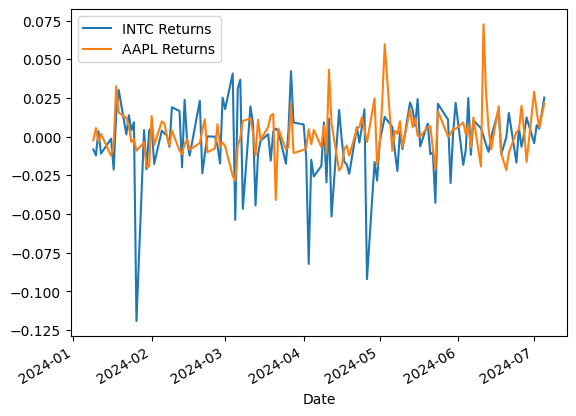

In [30]:
tech_stocks = ['MSFT', 'AAPL', 'CSCO', 'IBM', 'AMZN', 'INTC', 'VZ']
tech_stocks = ['INTC', 'AAPL']
financial_stocks = ['AXP', 'GS', 'JPM', 'TRV', 'V']
consumergoods_stocks = ['HD', 'KO', 'MCD', 'PG', 'WMT']
medical_stocks = ['AMGN', 'JNJ', 'MRK', 'UNH']
ax = None
for stock in tech_stocks:
    df = djia_returns[stock]
    
    df = df.reset_index()
    df = df[df['Date'] > today - np.timedelta64(180, 'D')]
    df.set_index('Date')
    df = df.rename(columns={"Return": f"{stock} Returns"})
    if ax is None:
        ax = df.plot(x='Date', y=f"{stock} Returns")
    else:
        df.plot(x='Date', y=f"{stock} Returns", ax=ax)

# NOT FINISHED YET

<h1>Constructing Momentum</h1>

2020-07-27 00:00:00
2020-07-27 00:00:00	196.80316162109375	167.5666046142578
2020-07-28 00:00:00	195.0364227294922	163.4845428466797
2020-07-29 00:00:00	197.00587463378906	170.82069396972656
2020-07-30 00:00:00	196.85142517089844	172.53440856933594
2020-07-31 00:00:00	197.9230194091797	168.0672607421875
2020-08-03 00:00:00	209.0544891357422	172.17820739746094
2020-08-04 00:00:00	205.91680908203125	174.0266571044922
2020-08-05 00:00:00	205.5789337158203	175.74038696289062
2020-08-06 00:00:00	208.87107849121094	176.76087951660156
2020-08-07 00:00:00	205.13485717773438	177.80062866210938
2020-08-10 00:00:00	201.05101013183594	179.78387451171875
2020-08-11 00:00:00	196.3494110107422	175.71148681640625
2020-08-12 00:00:00	201.95858764648438	173.05433654785156
2020-08-13 00:00:00	201.4854736328125	173.8052215576172
2020-08-14 00:00:00	201.67860412597656	176.3372802734375
2020-08-17 00:00:00	203.01087951660156	178.02210998535156
2020-08-18 00:00:00	204.17904663085938	176.7897491455078
2020-08

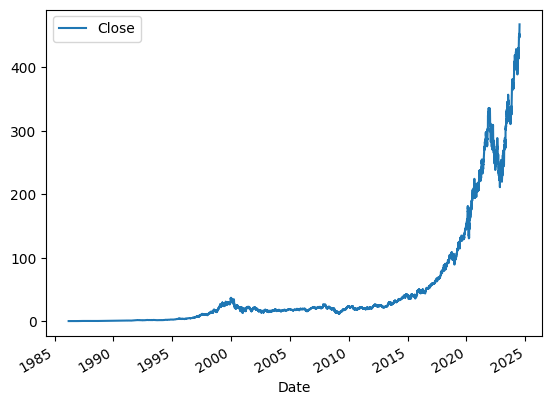

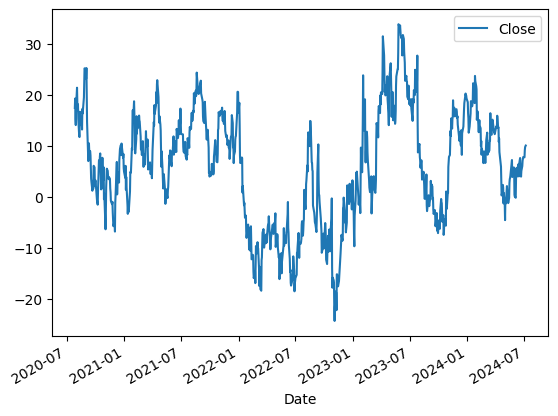

In [57]:
temp_djia_data['MSFT'].plot(x='Date', y='Close')
# 6 months 
stock_data = temp_djia_data['MSFT']
timedelta = pd.Timedelta(days=91) # closest multiple of 7, makes stuff EZ.

init_date = stock_data.iloc[8600]['Date'] + timedelta
print(init_date)

idx = stock_data[stock_data['Date'] == init_date].index

df_listed_data = []
while idx < len(stock_data):
    curr_row = stock_data.iloc[idx[0]]
    lag_date = curr_row['Date'] - timedelta
    #print(lag_date)
    lag_data = stock_data[stock_data['Date'] == lag_date]
    
    if len(lag_data) == 0:
        idx += 1
        continue
    print(f"{curr_row['Date']}\t{curr_row['Close']}\t{lag_data.iloc[0]['Close']}")
    momentum = ( (curr_row['Close'] / lag_data.iloc[0]['Close']) - 1) * 100
    
    df_listed_data.append((curr_row['Date'], momentum))
    idx += 1

df = pd.DataFrame(df_listed_data,columns=['Date', 'Close'])
df.plot(x='Date', y='Close')
print(df)

    
    
